<h1 style="color:#191970"> Gathering Data </h1>

<h2 style="color:purple"> Import Necessary Libraries and Modules </h2>

In [1070]:
import emailer
import info_grabber as grabber
import data_cleaner as dc
import requests 
import re
import pandas as pd
import time
import numpy as np
import getpass
import base64
import reverse_geocode
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3> Gathering Data From Yelp using Yelp Fusion API</h3>

In [916]:
# Take a look at yelp_api_grabber to dig deeper into how the TutoringDataGrabber class works

# Instatiate the TutoringDataGrabber to collect the data
data_grabber = grabber.TutoringDataGrabber(["Norwalk, CT", "Rochester, NY", "NYC", "Jersey City, NJ", "Newark, NJ", "New Haven, CT"])

# collect the data for certain locations in the tristate area
api_data_info = data_grabber.gather_tutoring_data()

In [2218]:
data_grab = grabber.TutoringDataGrabber(["Los Angeles, CA", "San Francisco, CA", "Atlanta, GA", "Tulsa, OK", "Minneapolis, MN"])

# collect the data for certain locations in the tristate area
api_data_info_2 = data_grab.gather_tutoring_data()

100


<h3> Initial View of Raw Data </h3>
<br>
<i>You can skip this section if you have read and understood the methods in the yelp_api_grabber document. However, if you are insterested in my process of figuring out what information is important peek below.</i> 

In [917]:
# First view the length of the gathered data to determine how many data points we have collected.
len(api_data_info)

270

In [919]:
def compare(info, item_to_check, dic_key=None, br=True):
    call = str(info)
    if info == "keys":
        info = lambda x: x.keys()
    elif info == "values":
        info = lambda x: x.values()
    if dic_key == None:
        comparisons = [info(item_to_check[0])]
    else:
        comparisons = [info(item_to_check[0][dic_key])]
    for num, data in enumerate(item_to_check[1:]):
        if dic_key != None:
            item = info(data[dic_key])
        else:
            item = info(data)
        if comparisons[0] != item:
            comparisons.append((num, item))
            if br:
                return f"Original: {comparisons[0]}\n Different from original: {comparisons[1:]}"
    if not br:
        return f"Original: {comparisons[0]}\n Different from original: {comparisons[1:]}"
                
    return f"No difference! All {call} are {comparisons[0]}."

In [920]:
# Take a look the type of the elements in api_data
print(compare(type, api_data_info))

No difference! All <class 'type'> are <class 'dict'>.


In [921]:
# Each element in api_data is a dictionary, what are the important keys and see if 
print(compare("keys", api_data_info))

Original: dict_keys(['businesses', 'total', 'region'])
 Different from original: [(51, dict_keys(['error']))]


In [924]:
print(compare("keys", api_data_info, br=False))

Original: dict_keys(['businesses', 'total', 'region'])
 Different from original: [(51, dict_keys(['error'])), (52, dict_keys(['error'])), (53, dict_keys(['error'])), (54, dict_keys(['error'])), (55, dict_keys(['error'])), (56, dict_keys(['error'])), (57, dict_keys(['error'])), (58, dict_keys(['error'])), (59, dict_keys(['error'])), (60, dict_keys(['error'])), (61, dict_keys(['error'])), (62, dict_keys(['error'])), (63, dict_keys(['error'])), (64, dict_keys(['error'])), (65, dict_keys(['error'])), (66, dict_keys(['error'])), (67, dict_keys(['error'])), (68, dict_keys(['error'])), (69, dict_keys(['error'])), (70, dict_keys(['error'])), (71, dict_keys(['error'])), (72, dict_keys(['error'])), (73, dict_keys(['error'])), (74, dict_keys(['error'])), (75, dict_keys(['error'])), (76, dict_keys(['error'])), (77, dict_keys(['error'])), (78, dict_keys(['error'])), (79, dict_keys(['error'])), (80, dict_keys(['error'])), (81, dict_keys(['error'])), (82, dict_keys(['error'])), (83, dict_keys(['error

In [925]:
api_data_info[189]

{'error': {'code': 'VALIDATION_ERROR',
  'description': '1050 is greater than the maximum of 1000',
  'field': 'offset',
  'instance': 1050}}

Every item in our gathered list are all the same type and but some have an error because we maxed out on the yelp api call. We are interested in the values that pair with the business key, so we must account for the missing key in our cleaning function. 

In [928]:
# Let's see the data type for the businesses key.
type(api_data_info[0]["businesses"])

list

We also see that the type for the value in for the business key is a list. We should account for list of different lengths in our cleaning function.

In [929]:
# Let's see the data type of an item in the values for the businesses key.
type(api_data_info[0]["businesses"][0])

dict

Lastly, we see that the type for an item in the value list for the business key is a dict. We continue this frame of thinking as we prepare our function for cleaning the data. Thinking about potential missing dict keys and mismatching list lengths.

<h3> Preprocessing: Initial Clean of the Data </h3>

We want to collect the business data from api_data and create an initial pandas dataframe to explore the data. We'll use the functions in the data_cleaner.py script.

In [984]:
# Initialize the cleaner by giving it the api_data
cleaner = dc.TutoringDataCleaner(api_data_info)

# convert the business data into dataframe
df = cleaner.parse()
# clean_df_tri_state = clean_yelp_search(api_data)

In [2219]:
cleaner1 = dc.TutoringDataCleaner(api_data_info_2, complete=True)

# convert the business data into dataframe
# df_la = cleaner1.parse()
# clean_df_tri_state = clean_yelp_search(api_data)

In [2224]:
df1_la = cleaner1.parse()

In [2225]:
df1_la

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,pj-test-prep-venice,"[{'alias': 'testprep', 'title': 'Test Preparat...","{'latitude': 34.0025978088379, 'longitude': -1...",(310) 529-7285,15066.123280,Kt1o7wCzfGQQg0pu0YrCGQ,https://s3-media1.fl.yelpcdn.com/bphoto/bD_PPd...,False,"{'address1': '818 Commonwealth Ave', 'address2...",PJ Test Prep,+13105297285,NaN,4.0,1,[],https://www.yelp.com/biz/pj-test-prep-venice?a...
1,abels-driving-school-los-angeles,"[{'alias': 'driving_schools', 'title': 'Drivin...","{'latitude': 34.05207, 'longitude': -118.3758}",(310) 360-6886,5123.031736,HZ3-2n4upVYDVigrtEcrWQ,https://s3-media3.fl.yelpcdn.com/bphoto/uzJxDA...,False,"{'address1': '1436 S La Cienega Blvd', 'addres...",Abel's Driving School,+13103606886,NaN,4.5,145,[],https://www.yelp.com/biz/abels-driving-school-...
2,tutor-me-la-los-angeles-2,"[{'alias': 'privatetutors', 'title': 'Private ...","{'latitude': 34.0607769, 'longitude': -118.446...",(310) 896-8625,11480.568141,phCf8WCK6KyfnhCSkIhl4g,https://s3-media3.fl.yelpcdn.com/bphoto/cWwn0k...,False,"{'address1': '1093 Broxton Ave', 'address2': '...",Tutor Me LA,+13108968625,NaN,5.0,133,[],https://www.yelp.com/biz/tutor-me-la-los-angel...
3,the-therapist-development-center-los-angeles,"[{'alias': 'testprep', 'title': 'Test Preparat...","{'latitude': 34.0364846, 'longitude': -118.449...",,12166.982042,8hFFnDlhj3nSYUENlrIA3Q,https://s3-media4.fl.yelpcdn.com/bphoto/uoETrU...,False,"{'address1': '2001 Barrington Ave', 'address2'...",The Therapist Development Center,,NaN,4.5,107,[],https://www.yelp.com/biz/the-therapist-develop...
4,fuji-school-los-angeles-14,"[{'alias': 'language_schools', 'title': 'Langu...","{'latitude': 34.04778, 'longitude': -118.2418045}",(213) 788-3305,7490.064114,efKfjFGA5DDHLX0iR_exwA,https://s3-media2.fl.yelpcdn.com/bphoto/C07RRd...,False,"{'address1': '244 S San Pedro St', 'address2':...",FUJI School,+12137883305,NaN,5.0,75,[],https://www.yelp.com/biz/fuji-school-los-angel...
5,testmasters-los-angeles,"[{'alias': 'testprep', 'title': 'Test Preparat...","{'latitude': 34.0650059, 'longitude': -118.373...",(800) 696-5728,4805.856076,FPkS73V91s0-bJRBoPKhLg,https://s3-media4.fl.yelpcdn.com/bphoto/DnrjlW...,False,"{'address1': '8383 Wilshire Blvd', 'address2':...",TestMasters,+18006965728,NaN,5.0,69,[],https://www.yelp.com/biz/testmasters-los-angel...
6,a-tutoring-studio-city,"[{'alias': 'privatetutors', 'title': 'Private ...","{'latitude': 34.146503, 'longitude': -118.4220...",(818) 850-6284,13230.233838,zMWyOZgMilMp9jBXcZimPw,https://s3-media2.fl.yelpcdn.com/bphoto/zQ3-RU...,False,"{'address1': '13273 Ventura Blvd', 'address2':...",A+ Tutoring,+18188506284,NaN,5.0,66,[],https://www.yelp.com/biz/a-tutoring-studio-cit...
7,la-tutors-123-beverly-hills,"[{'alias': 'tutoring', 'title': 'Tutoring Cent...","{'latitude': 34.0693582, 'longitude': -118.404...",(213) 622-1155,7743.645041,AoWsO9C-PHYg0SvmzUi4ZA,https://s3-media4.fl.yelpcdn.com/bphoto/tBoaiB...,False,"{'address1': '9454 Wilshire Blvd', 'address2':...",LA Tutors 123,+12136221155,NaN,5.0,57,[],https://www.yelp.com/biz/la-tutors-123-beverly...
8,stacy-blackman-consulting-west-hollywood-3,"[{'alias': 'privatetutors', 'title': 'Private ...","{'latitude': 34.0873587, 'longitude': -118.380...",(323) 934-3936,6181.285984,I-q1HqqOT-2xVAh-KBxb7g,https://s3-media2.fl.yelpcdn.com/bphoto/-SH27f...,False,"{'address1': '8721 Santa Monica Blvd', 'addres...",Stacy Blackman Consulting,+13239343936,NaN,5.0,54,[],https://www.yelp.com/biz/stacy-blackman-consul...
9,one-timers-bar-review-santa-monica-2,"[{'alias': 'testprep', 'title': 'Test Preparat...","{'latitude': 34.0248718261719, 'longitude': -1...",(800) 550-1525,16441.018989,VCHmplMvaP9c6suALl17Ug,https://s3-media1.fl.yelpcdn.com/bphoto/OmruoK...,False,"{'address1': '', 'address2': '', 'address3': '...",One-Timers Bar Review,+18005501525,NaN,5.0,49,[],https://www.yelp.com/biz/one-timers-bar

In [985]:
df.shape

(7479, 16)

In [986]:
cleaner.view_item_type().head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,<class 'str'>,<class 'list'>,<class 'dict'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'bool'>,<class 'dict'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'list'>,<class 'str'>
1,<class 'str'>,<class 'list'>,<class 'dict'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'bool'>,<class 'dict'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'list'>,<class 'str'>
2,<class 'str'>,<class 'list'>,<class 'dict'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'bool'>,<class 'dict'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'list'>,<class 'str'>
3,<class 'str'>,<class 'list'>,<class 'dict'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'bool'>,<class 'dict'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'list'>,<class 'str'>
4,<class 'str'>,<class 'list'>,<class 'dict'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'bool'>,<class 'dict'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'list'>,<class 'str'>


In [987]:
cleaner.columns_to_break_down([list, dict])

<class 'list'>
['categories' 'transactions'] 

<class 'dict'>
['coordinates' 'location'] 



array(['categories', 'coordinates', 'location', 'transactions'],
      dtype=object)

In [988]:
df = cleaner.breakdown_list_types(df)

In [2226]:
df1_la = cleaner.breakdown_list_types(df1_la)

In [989]:
df_tri_state = cleaner.collapse(df)

In [2227]:
df1_la = cleaner.collapse(df1_la)

In [990]:
df_tri_state.shape

(7479, 25)

In [2228]:
df1_la.shape

(11296, 25)

In [991]:
df_tri_state.head()

,display_phone,id,is_closed,name,phone,price,rating,review_count,url,location_0,...,location_6,coordinates,alias_0,title_0,alias_1,title_1,alias_2,title_2,alias_3,title_3
0,(212) 220-1538,oS0Ww3Nnq-gMlN8C_7zkYw,False,MCAT KING,+12122201538,NaN,5.0,11,https://www.yelp.com/biz/mcat-king-new-york?ad...,213 W 35th St,...,NY,"(40.752136, -73.990684)",privatetutors,Private Tutors,testprep,Test Preparation,NaN,NaN,NaN,NaN
1,(888) 215-6269,KNlRkqWwok9Sohm3Ejzfxw,False,Manhattan Elite Prep,+18882156269,NaN,4.0,11,https://www.yelp.com/biz/manhattan-elite-prep-...,521 5th Ave,...,NY,"(40.754169, -73.97982)",tutoring,Tutoring Centers,privatetutors,Private Tutors,testprep,Test Preparation,NaN,NaN
2,(212) 359-4208,ryqawESyMqitMuZCmsxGcQ,False,CATES Tutoring,+12123594208,NaN,2.5,8,https://www.yelp.com/biz/cates-tutoring-new-yo...,205 E 42nd St,...,NY,"(40.75081, -73.97354)",privatetutors,Private Tutors,testprep,Test Preparation,careercounseling,Career Counseling,NaN,NaN
3,(877) 246-1711,8o7o1yQ-3dnXlFQk4PhsmQ,False,Simply Brilliant,+18772461711,NaN,5.0,4,https://www.yelp.com/biz/simply-brilliant-manh...,None,...,NY,"(40.7593941, -73.9697795)",testprep,Test Preparation,privatetutors,Private Tutors,tutoring,Tutoring Centers,NaN,NaN
4,(914) 232-3743,IBL3Y39_I4rxpFmBQ2zjQg,False,Sheptin Tutoring Group,+19142323743,NaN,5.0,3,https://www.yelp.com/biz/sheptin-tutoring-grou...,175 King St,...,NY,"(41.1595399, -73.764855)",tutoring,Tutoring Centers,privatetutors,Private Tutors,testprep,Test Preparation,NaN,NaN


Find all the unique titles and visually look at the titles that are tutoring related

In [1693]:
arr_comb_all = cleaner.get_unique("title", df_tri_state) 

In [2229]:
arr_comb_all_1 = cleaner1.get_unique("title", df1_la) 

In [1694]:
df_tri_state1 = cleaner.title_encoding(df_tri_state)
df_tri_state1.shape

(7479, 30)

In [2230]:
df_tri_state2 = cleaner.title_encoding(df1_la)
df_tri_state2.shape

(11296, 30)

In [1695]:
df_tri_state1 = cleaner.find_tutoring(df_tri_state1)
df_tri_state1.shape

(3714, 30)

In [1936]:
df_biz_tri = df_tri_state1.drop_duplicates().reset_index().drop(["index"], axis=1)

In [2231]:
df_biz_tri1 = df_tri_state2.drop_duplicates().reset_index().drop(["index"], axis=1)

In [2232]:
df_biz_tri.shape

(6843, 30)

In [2240]:
df_biz_tri1.shape

(6843, 30)

### Extra Touch Ups

We will remove any companies that are not in the tri-state area(NY, NJ, CT).

In [1938]:
df_biz_tri_only = df_biz_tri[df_biz_tri.location_6.apply(lambda x: x in ["CT", "NY", "NJ"])].reset_index().drop(["index"], axis=1)

In [2234]:
df_biz_tri_only1 = df_biz_tri1[df_biz_tri1.location_6.apply(lambda x: x in ["LA", "GA", "OK", "MN"])].reset_index().drop(["index"], axis=1)

In [1699]:
df_biz_tri_only.to_json("tristatedatafinal.json")

In [2236]:
df_biz_tri_only1.shape

(1571, 30)

### Getting Area Data From areavibes.com For Each Zipcode

In [2237]:
scraper = grabber.TutoringScraper("/Users/flatironschool/Downloads/chromedriver")

In [2238]:
zipcodes2 = df_biz_tri_only1.location_4.unique()

In [2250]:
zipcode_df = scraper.get_multi_area_data(zipcodes2)

50
100
150
200


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//input[@maxlength='160']"}
  (Session info: chrome=74.0.3729.131)
  (Driver info: chromedriver=74.0.3729.6 (255758eccf3d244491b8a1317aa76e1ce10d57e9-refs/branch-heads/3729@{#29}),platform=Mac OS X 10.13.6 x86_64)


In [1704]:
zipcode_df.head()

,Amenities,Cost of Living,Crime,Employment,Housing,Livability,Schools,Weather,zipcode
10001,A+,F,F,A+,F,70,A+,C-,10001
10175,A+,F,F,A+,F,64,A+,C-,10175
10017,A+,F,F,A+,F,64,A+,C-,10017
10022,A+,F,F,A+,F,64,A+,C-,10022
10514,A+,F,A+,A+,F,77,A+,D+,10514


In [1709]:
livingdf = acleaner.clean_living_data(df_biz_tri_only ,zipcode_df)
livingdf.head()

,Amenities,Cost of Living,Crime,Employment,Housing,Livability,Schools,Weather,zipcode
0,13,1,1,13,1,70,13,5,10001
1,13,1,1,13,1,64,13,5,10175
2,13,1,1,13,1,64,13,5,10017
3,13,1,1,13,1,64,13,5,10022
4,13,1,13,13,1,77,13,4,10514


In [1712]:
livingdf.to_json("livingdataclean.json")

### Gathering Demographic Data From  movoto.com For Each Zipcode

In [2243]:
dem = scraper.get_all_area_dem(df_biz_tri_only)
dem.head()

KeyboardInterrupt: 

In [2242]:
acleaner = dc.AreaDataCleaner(df_biz_tri_only1)
demographic2 = acleaner.clean_area_dem(dem)

In [1726]:
demographic.head()

,1k_to_1499_rent,"1.5k_to_1,999_rent",150k_plus_salary,2k_plus_rent,"30k_to_74,999_salary",600_to_999_rent,"75k_to_149,999_salary",1_person_household,age_range_10_to_17,age_range_18_to_24,...,not_in_labor_force,owner_occupied_home,private_vehicle,public_transportation,renter_occupied_home,taxi,unemployed,walk_or_bicycle,work_from_home,zipcode
0,0.113,0.088,0.322,0.482,0.2,0.15,0.23,0.536,0.054,0.147,...,0.294,0.272,0.046,0.416,0.728,0.036,0.059,0.429,0.057,10001
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10175
2,0.122,0.226,0.348,0.572,0.219,0.045,0.288,0.609,0.006,0.078,...,0.191,0.368,0.054,0.359,0.632,0.026,0.027,0.484,0.067,10017
3,0.087,0.25,0.435,0.561,0.184,0.076,0.251,0.557,0.016,0.046,...,0.294,0.486,0.114,0.386,0.514,0.045,0.032,0.36,0.09,10022
4,0.245,0.3,0.678,0.265,0.098,0,0.173,0.12,0.153,0.062,...,0.351,0.936,0.531,0.326,0.064,0,0.016,0.025,0.116,10514


In [1538]:
demographic.to_json("dgraphics.json")

### Getting Review Data From Yelp

In [2241]:
dfrev1 = scraper.get_all_reviews(df_biz_tri_only1)

0       https://www.yelp.com/biz/paul-mitchell-the-sch...
1       https://www.yelp.com/biz/georgia-state-univers...
2       https://www.yelp.com/biz/the-cooks-warehouse-a...
3       https://www.yelp.com/biz/the-national-society-...
4       https://www.yelp.com/biz/ced-solutions-mariett...
5       https://www.yelp.com/biz/alfa-driving-school-a...
6       https://www.yelp.com/biz/americas-real-estate-...
7       https://www.yelp.com/biz/the-goddard-school-at...
8       https://www.yelp.com/biz/manhattan-prep-atlant...
9       https://www.yelp.com/biz/h2k-infosys-johns-cre...
10      https://www.yelp.com/biz/project-management-ac...
11      https://www.yelp.com/biz/blueprint-lsat-prepar...
12      https://www.yelp.com/biz/a-1-driving-school-jo...
13      https://www.yelp.com/biz/the-marlowe-school-at...
14      https://www.yelp.com/biz/omega-learning-center...
15      https://www.yelp.com/biz/access-test-prep-and-...
16      https://www.yelp.com/biz/richmond-tutors-atlan...
17      https:

0       https://www.yelp.com/biz/paul-mitchell-the-sch...
1       https://www.yelp.com/biz/georgia-state-univers...
2       https://www.yelp.com/biz/the-cooks-warehouse-a...
3       https://www.yelp.com/biz/the-national-society-...
4       https://www.yelp.com/biz/ced-solutions-mariett...
5       https://www.yelp.com/biz/alfa-driving-school-a...
6       https://www.yelp.com/biz/americas-real-estate-...
7       https://www.yelp.com/biz/the-goddard-school-at...
8       https://www.yelp.com/biz/manhattan-prep-atlant...
9       https://www.yelp.com/biz/h2k-infosys-johns-cre...
10      https://www.yelp.com/biz/project-management-ac...
11      https://www.yelp.com/biz/blueprint-lsat-prepar...
12      https://www.yelp.com/biz/a-1-driving-school-jo...
13      https://www.yelp.com/biz/the-marlowe-school-at...
14      https://www.yelp.com/biz/omega-learning-center...
15      https://www.yelp.com/biz/access-test-prep-and-...
16      https://www.yelp.com/biz/richmond-tutors-atlan...
17      https:

0       https://www.yelp.com/biz/paul-mitchell-the-sch...
1       https://www.yelp.com/biz/georgia-state-univers...
2       https://www.yelp.com/biz/the-cooks-warehouse-a...
3       https://www.yelp.com/biz/the-national-society-...
4       https://www.yelp.com/biz/ced-solutions-mariett...
5       https://www.yelp.com/biz/alfa-driving-school-a...
6       https://www.yelp.com/biz/americas-real-estate-...
7       https://www.yelp.com/biz/the-goddard-school-at...
8       https://www.yelp.com/biz/manhattan-prep-atlant...
9       https://www.yelp.com/biz/h2k-infosys-johns-cre...
10      https://www.yelp.com/biz/project-management-ac...
11      https://www.yelp.com/biz/blueprint-lsat-prepar...
12      https://www.yelp.com/biz/a-1-driving-school-jo...
13      https://www.yelp.com/biz/the-marlowe-school-at...
14      https://www.yelp.com/biz/omega-learning-center...
15      https://www.yelp.com/biz/access-test-prep-and-...
16      https://www.yelp.com/biz/richmond-tutors-atlan...
17      https:

0       https://www.yelp.com/biz/paul-mitchell-the-sch...
1       https://www.yelp.com/biz/georgia-state-univers...
2       https://www.yelp.com/biz/the-cooks-warehouse-a...
3       https://www.yelp.com/biz/the-national-society-...
4       https://www.yelp.com/biz/ced-solutions-mariett...
5       https://www.yelp.com/biz/alfa-driving-school-a...
6       https://www.yelp.com/biz/americas-real-estate-...
7       https://www.yelp.com/biz/the-goddard-school-at...
8       https://www.yelp.com/biz/manhattan-prep-atlant...
9       https://www.yelp.com/biz/h2k-infosys-johns-cre...
10      https://www.yelp.com/biz/project-management-ac...
11      https://www.yelp.com/biz/blueprint-lsat-prepar...
12      https://www.yelp.com/biz/a-1-driving-school-jo...
13      https://www.yelp.com/biz/the-marlowe-school-at...
14      https://www.yelp.com/biz/omega-learning-center...
15      https://www.yelp.com/biz/access-test-prep-and-...
16      https://www.yelp.com/biz/richmond-tutors-atlan...
17      https:

0       https://www.yelp.com/biz/paul-mitchell-the-sch...
1       https://www.yelp.com/biz/georgia-state-univers...
2       https://www.yelp.com/biz/the-cooks-warehouse-a...
3       https://www.yelp.com/biz/the-national-society-...
4       https://www.yelp.com/biz/ced-solutions-mariett...
5       https://www.yelp.com/biz/alfa-driving-school-a...
6       https://www.yelp.com/biz/americas-real-estate-...
7       https://www.yelp.com/biz/the-goddard-school-at...
8       https://www.yelp.com/biz/manhattan-prep-atlant...
9       https://www.yelp.com/biz/h2k-infosys-johns-cre...
10      https://www.yelp.com/biz/project-management-ac...
11      https://www.yelp.com/biz/blueprint-lsat-prepar...
12      https://www.yelp.com/biz/a-1-driving-school-jo...
13      https://www.yelp.com/biz/the-marlowe-school-at...
14      https://www.yelp.com/biz/omega-learning-center...
15      https://www.yelp.com/biz/access-test-prep-and-...
16      https://www.yelp.com/biz/richmond-tutors-atlan...
17      https:

KeyboardInterrupt: 

In [1031]:
dfrev = scraper.get_all_reviews(df_biz_tri_only)

0


In [1879]:
review_cleaner = dc.ReviewDataCleaner(dfrev1)

In [2032]:
cleaned_review_df = review_cleaner.clean_all_reviews(dfrev1)

In [2089]:
cleaned_review_df.sort_values("business_name")

,business_name,date,elite_status,friend_count,photo_count,review,review_count,star_rating,user_location,user_name
5228,123 Kinderstar Day School,2012-09-02,0.0,0,0,"First to Review Excellent school, great teache...",3,5.0,"Pompton Lakes, NJ",Han S.
757,180 Degrees LSAT,2014-07-14,0.0,4,0,When I signed up to take the LSAT I had no ide...,4,5.0,"Manhattan, NY",Rachel L.
758,180 Degrees LSAT,2012-04-03,0.0,0,0,"Thanks to Larkin, I raised my score from the l...",7,5.0,"Manhattan, NY",Julia K.
759,180 Degrees LSAT,2015-07-17,0.0,21,1,I had a great experience working with Larkin. ...,21,5.0,"New York, NY",Jennifer W.
760,180 Degrees LSAT,2015-03-31,0.0,0,0,Some background: I took a Kaplan course for tw...,17,5.0,"Brooklyn, NY",Mike B.
761,180 Degrees LSAT,2012-04-02,0.0,1,0,"I have to agree with Dave T. Larkin, the owne...",7,5.0,"Brooklyn, NY",Mojgan H.
762,180 Degrees LSAT,2013-08-01,0.0,0,1,"I have never used a tutor before, but after fr...",7,5.0,"Manhattan, NY",Qi Z.
763,180 Degrees LSAT,2013-09-23,0.0,23,11,Larkin really changed my whole way of thinking...,20,5.0,"Flushing, NY",Ricky L.
764,180 Degrees LSAT,2013-07-14,0.0,2,0,I was lucky to be chosen as one of the recipie...,6,5.0,"Staten Island, NY",Michelle G.
765,180 Degrees LSAT,2013-01-30,0.0,1,0,"The tutoring was laid back and comfortable, wh...",6,5.0,"Flushing, NY",Ted P.


In [2197]:
dfrev2 = pd.DataFrame(df_biz_tri.sort_values("name").iloc[[170, 965, 1045]]).reset_index().drop(["index"], axis=1)

In [2198]:
dfrev2

,display_phone,id,is_closed,name,phone,price,rating,review_count,url,location_0,...,title_1,alias_2,title_2,alias_3,title_3,title_0_code,title_1_code,title_2_code,title_3_code,counts
0,(203) 952-0035,Y3wfEhOUIQRzM3SGD4gkhg,False,C2 Education of Darien,+12039520035,NaN,5.0,1,https://www.yelp.com/biz/c2-education-of-darie...,25 Old Kings Highway N,...,Tutoring Centers,privatetutors,Private Tutors,NaN,NaN,1,1,1,0,3
1,(347) 699-6895,fcwfK5FB1vkiK_TwVpHsZQ,False,Talent Prep,+13476996895,NaN,5.0,12,https://www.yelp.com/biz/talent-prep-manhattan...,155 East Broadway,...,Private Tutors,language_schools,Language Schools,NaN,NaN,1,1,0,0,2
2,(973) 839-1515,1QmRe9xvWnmWS-vqMnzPqg,False,The Learning Experience - Wayne,+19738391515,NaN,5.0,4,https://www.yelp.com/biz/the-learning-experien...,1784 Hamburg Turnpike,...,Preschools,NaN,NaN,NaN,NaN,0,1,0,0,1


In [2199]:
dfrevc2 = scraper.get_all_reviews(dfrev2)

0    https://www.yelp.com/biz/c2-education-of-darie...
1    https://www.yelp.com/biz/talent-prep-manhattan...
2    https://www.yelp.com/biz/the-learning-experien...
Name: url, dtype: object
1
2
3
https://www.yelp.com/biz/c2-education-of-darien-darien?adjust_creative=5onuGByRauHpN8oN0PEgtw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5onuGByRauHpN8oN0PEgtw
https://www.yelp.com/biz/c2-education-of-darien-darien
0    https://www.yelp.com/biz/c2-education-of-darie...
1    https://www.yelp.com/biz/talent-prep-manhattan...
2    https://www.yelp.com/biz/the-learning-experien...
Name: url, dtype: object
1
2
3
https://www.yelp.com/biz/talent-prep-manhattan-3?adjust_creative=5onuGByRauHpN8oN0PEgtw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=5onuGByRauHpN8oN0PEgtw
https://www.yelp.com/biz/talent-prep-manhattan-3
0    https://www.yelp.com/biz/c2-education-of-darie...
1    https://www.yelp.com/biz/talent-prep-manhattan...
2    https://www.yelp.com/

In [2201]:
revc2df = review_cleaner.clean_all_reviews(dfrevc2)

In [2202]:
revc2df

,business_name,date,friend_count,photo_count,review,review_count,star_rating,user_location,user_name
0,C2 Education of Darien,2017-04-26,0,23,First to Review Great tutoring. Jackie (center...,38,5.0,"Darien, CT",D M.
1,Talent Prep,2016-01-09,1,5,Updated review Could not have asked for a bett...,9,5.0,"New York, NY",Sara G.
2,Talent Prep,2018-06-22,0,1,Definitely recommend them for any tutoring or ...,9,5.0,"Brooklyn, NY",Jan84sam ..
3,Talent Prep,2018-01-20,10,7,My 4.5 years old son took a series of prep cou...,11,5.0,"Brooklyn, NY",Anna K.
4,Talent Prep,2016-09-18,44,11,"Agreed with the the other reviewers, the teach...",13,4.0,"Brooklyn, NY",ZJ L.
5,Talent Prep,2016-06-21,0,1,We are really happy with Talent Prep! We came ...,10,5.0,"Los Altos, CA",Christine W.
6,Talent Prep,2016-10-14,256,1,I enrolled my daughter (3yrs old at the time) ...,7,5.0,"New York, NY",Mary C.
7,Talent Prep,2015-04-01,14,0,My aunt asked me to find a place for my cousin...,75,5.0,"Queens, NY",Eric S.
8,Talent Prep,2015-03-02,1,0,Had a free demo pre ballet class for my daught...,1,5.0,"Manhattan, NY",Jew wei S.
9,Talent Prep,2014-09-02,117,5,I checked out the companies website after the ...,5,5.0,"Flushing, NY",Yang P.


In [2203]:
consolidated_revc2df = pd.DataFrame(revc2df.groupby("business_name", sort=False).apply(lambda x: x.review.tolist()), columns=["reviews"])

In [2204]:
consolidated_revc2df

,reviews
business_name,
C2 Education of Darien,[First to Review Great tutoring. Jackie (cente...
Talent Prep,[Updated review Could not have asked for a bet...
The Learning Experience - Wayne,"[Great location! Not all TLEs are the same, th..."


In [2206]:
new_rev_no_revs_c2 = revc2df.drop(["review", "user_location", "user_name", "date"], axis=1)
consolidated_means_c3 = pd.DataFrame(new_rev_no_revs_c2.groupby("business_name", sort=False).apply(lambda x: x.astype(float).mean()))


In [2211]:
consol = pd.concat([consolidated_revc2df, consolidated_means_c3], axis=1).reset_index()
consol

,business_name,reviews,friend_count,photo_count,review_count,star_rating
0,C2 Education of Darien,[First to Review Great tutoring. Jackie (cente...,0.00,23.000000,38.000000,5.000000
1,Talent Prep,[Updated review Could not have asked for a bet...,37.25,3.166667,14.333333,4.833333
2,The Learning Experience - Wayne,"[Great location! Not all TLEs are the same, th...",30.75,0.250000,15.750000,4.750000


In [2099]:
name = ""
names = []
start = []
count = 0
new_rev = pd.DataFrame()
for n, row in cleaned_review_df.iterrows():
    if name != row.business_name+f"{count}":
        names.append(row.business_name)
        start.append(n)
        count += 1
        row.business_name = row.business_name + f"{count}"
        name = row.business_name
        new_rev = pd.concat([new_rev, pd.DataFrame(row)], axis=1)
    else:
        row.business_name = row.business_name + f"{count}"
        new_rev = pd.concat([new_rev, pd.DataFrame(row)], axis=1)
        


In [2100]:
new_rev = new_rev.T.drop(["date"], axis=1)
new_rev_no_revs = new_rev.drop(["review", "user_location", "user_name"], axis=1)

In [2101]:
consolidated_reviews = pd.DataFrame(new_rev.groupby("business_name", sort=False).apply(lambda x: x.review.tolist()), columns=["reviews"])



In [2102]:
cleaned_review_df.to_json("cleanedrevsfin2.json")

In [2103]:
consolidated_means = pd.DataFrame(new_rev_no_revs.groupby("business_name", sort=False).apply(lambda x: x.astype(float).mean()))




In [2111]:
consolidated = pd.concat([consolidated_means, consolidated_reviews], axis=1).reset_index().reset_index()

In [2129]:
consolidated["length"] = consolidated["index"].astype(str).str.len()

In [2149]:
latest = pd.DataFrame()
for _, row in consolidated.iterrows():
    row.business_name = row.business_name[:-row.length]
    latest = pd.concat([latest, row], axis=1)

latest.T

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,business_name,elite_status,friend_count,index,length,photo_count,review_count,reviews,star_rating
0,MCAT KING,0,84.2727,0,1,2,8.18182,[Noble is THE best! I can't believe I waited s...,5
1,Manhattan Elite Prep,0,33.9,1,1,2.5,11.8,"[For me, as a working professional with a stro...",4.2
2,CATES Tutoring,0,147.75,2,1,3,21.25,"[Thanks to Chris and his team, I was able to g...",2.5
3,Simply Brilliant,0,15.75,3,1,1,8,[Stuart Park of Simply Brilliant truly helped ...,5
4,Sheptin Tutoring Group,0,36.3333,4,1,8.33333,12.3333,[Sheptin has been an amazing resource for our ...,5
5,Tutor Me NY,0.5,318,5,1,64.5,47.5,[This review is long overdue. Last year my cou...,5
6,JM Learning,0,12.5,6,1,0,12.5,[I highly recommend JM learning to everyone t...,5
7,Math Academy Tutoring,0,2,7,1,0,44.5,[First to Review Math Academy is phenomenal! I...,4.5
8,SharkTutorCT,0,68,8,1,430,343,[First to Review I met Sharon and I was blown ...,5
9,C2 Education of Darien1,0,0,9,1,23,38,[First to Review Great tutoring. Jackie (cente...,5


In [2146]:
latest.to_json("consolidated_review.json")

In [2097]:
consolidated.to_json("consolidated_review.json")

We lost a few businesses after gathering the review, but that is ok for this project.

In [1376]:
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
import nltk

In [1383]:
import spacy
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [1384]:
count_vectorizer = CountVectorizer()

In [1393]:
test_df.index = test_df.business_name

In [1397]:
test_df.index = range(len(test_df))

In [1651]:
test_df.iloc[33]

business_name                                       Manhattan Prep
date                                                    2012-04-25
elite_status                                                   NaN
friend_count                                            99 friends
photo_count                                              Elite ’19
review           It has been my experience that there are very ...
review_count                                           529 reviews
star_rating                                                    5.0
user_location                                        Manhattan, NY
user_name                                                Bryant R.
Name: 33, dtype: object

In [1402]:
mini_corp = {"target":test_df.star_rating.to_list(), "data" :test_df.review.to_list()}

In [1405]:
x_train_counts = count_vectorizer.fit_transform(mini_corp["data"])

In [1414]:
count_vectorizer.vocabulary_.get('recommend')

2768

In [1415]:
tf_transformer = TfidfTransformer(use_idf=False).fit(x_train_counts)
x_train_tf = tf_transformer.transform(x_train_counts)

In [1404]:
rdf = reviews_only_df.review.apply(word_tokenize)

In [1417]:
clf = MultinomialNB()
clf.fit(x_train_tf, mini_corp["target"])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [1418]:
text_clf = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ])

In [1420]:
text_clf.fit(mini_corp["data"], mini_corp["target"])

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
 ...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [1941]:
!pip install gensim 

    100% |████████████████████████████████| 24.7MB 912kB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 16.4MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 16.7MB/s ta 0:00:01
    100% |████████████████████████████████| 5.4MB 4.5MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 15.5MB/s ta 0:00:01
  Stored in directory: /Users/flatironschool/Library/Caches/pip/wheels/b8/cb/43/c0ba52baf2b0e371ec1d5b2d4685d6d24617b1391f3eeacda5
Successfully built smart-open


In [1996]:
import gensim
nltk.download('averaged_perceptron_tagger')
nltk.download('treebank')
nltk.download('gutenberg')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/flatironschool/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/flatironschool/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/flatironschool/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [2052]:
import re

In [2152]:
# |[\s]{2,}
pattern = r'([\.\,\'\\(\)\"\-\!\%\\\``\d]|[{.*}?\n]|)'
rev_only_one_df["clean_all_review"] = rev_only_one_df.all_review.apply(lambda x: re.sub(pattern, "", x))

In [2153]:
pattern2 = r'[\s]{2,}'
rev_only_one_df["clean_all_review"] = rev_only_one_df.clean_all_review.apply(lambda x: re.sub(pattern2, " ", x))

In [2156]:
rev_only_one_df["clean_all_review"] = rev_only_one_df["clean_all_review"].str.lower().str.strip("[]")
rev_only_one_df["tokenized"] = rev_only_one_df["clean_all_review"].apply(nltk.word_tokenize)

In [2167]:
rev_only_one_df

,business_name,all_review,clean_all_review,tokenized,tagged
0,Manhattan Prep,"[""I had an absolutely amazing experience in Vi...",i had an absolutely amazing experience in vict...,"[i, had, an, absolutely, amazing, experience, ...","[(i, NN), (had, VBD), (an, DT), (absolutely, R..."
1,180 Degrees LSAT,"[""Larkin is by far the best LSAT tutor in New ...",larkin is by far the best lsat tutor in new yo...,"[larkin, is, by, far, the, best, lsat, tutor, ...","[(larkin, NN), (is, VBZ), (by, IN), (far, RB),..."
2,Bright Kids NYC,"[""Updated review 2 check-ins I received my son...",updated review checkins i received my sons ise...,"[updated, review, checkins, i, received, my, s...","[(updated, VBN), (review, NN), (checkins, VBZ)..."
3,Veritas Prep,"[""I took the in person prep course with Eric M...",i took the in person prep course with eric mal...,"[i, took, the, in, person, prep, course, with,...","[(i, NN), (took, VBD), (the, DT), (in, IN), (p..."
4,Premier Aptitude,['I visited Premier Aptitude a couple of month...,i visited premier aptitude a couple of months ...,"[i, visited, premier, aptitude, a, couple, of,...","[(i, NN), (visited, VBD), (premier, JJR), (apt..."
5,Talent Prep,"[""Updated review Could not have asked for a be...",updated review could not have asked for a bett...,"[updated, review, could, not, have, asked, for...","[(updated, VBN), (review, NN), (could, MD), (n..."
6,MyGuru,['I would recommend MyGuru for test preparatio...,i would recommend myguru for test preparation ...,"[i, would, recommend, myguru, for, test, prepa...","[(i, NN), (would, MD), (recommend, VB), (mygur..."
7,Project Management Academy,['Very satisfied with this class and with my i...,very satisfied with this class and with my ins...,"[very, satisfied, with, this, class, and, with...","[(very, RB), (satisfied, JJ), (with, IN), (thi..."
8,Kweller Prep,['My daughter was accepted to Hunter High Scho...,my daughter was accepted to hunter high school...,"[my, daughter, was, accepted, to, hunter, high...","[(my, PRP$), (daughter, NN), (was, VBD), (acce..."
9,Bee Tutored,"[""First to Review My two daughters attended NY...",first to review my two daughters attended nyc ...,"[first, to, review, my, two, daughters, attend...","[(first, RB), (to, TO), (review, VB), (my, PRP..."


In [2000]:
from nltk.tree import Tree

In [2176]:
rev_only_one_df["clean_all_review"][1000]

' checkins first to review i enrolled my daughter for ballet after hearing great things about this school yolanda has been running this dance academy for over years and is one of the best in the areathey have won tons of trophies at competitionsmy daughter loved her first day and the teacher marianna was really sweet their tutu outfits with leotards are too cuteand its fun watching all the lil girls trying to match their steps i will review this place again once she has completed a term signed up my daughter for ballet and jazz so far so good my daughter likes it and it makes me happy cons only one the waiting area is extremely too small to where some parents have to wait outside in the street waiting room would be nice if it was larger and fit all the parents'

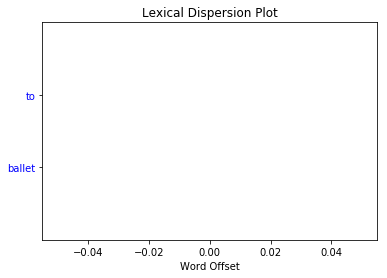

In [2180]:
nltk.draw.dispersion_plot(rev_only_one_df["clean_all_review"][1000], ["to", "ballet"])

Source: <br>
Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.

In [2161]:
rev_only_one_df["tagged"] = rev_only_one_df["tokenized"].apply(nltk.pos_tag)

In [1990]:
t = Tree("S", rev_only_one_df.tagged[0][:10])

In [1991]:
t.draw()

KeyboardInterrupt: 

In [1970]:
rev_only_one_df.tagged[0]

[('i', 'NN'),
 ('had', 'VBD'),
 ('an', 'DT'),
 ('absolutely', 'RB'),
 ('amazing', 'JJ'),
 ('experience', 'NN'),
 ('in', 'IN'),
 ('victoria', 'JJ'),
 ('crutchfield', 'NN'),
 ("'s", 'POS'),
 ('gre', 'JJ'),
 ('class', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('i', 'JJ'),
 ("'m", 'VBP'),
 ('certain', 'JJ'),
 ('my', 'PRP$'),
 ('fellow', 'JJ'),
 ('classmates', 'NNS'),
 ('did', 'VBD'),
 ('as', 'RB'),
 ('well', 'RB'),
 ('.', '.'),
 ('i', 'VB'),
 ('just', 'RB'),
 ('finished', 'VBN'),
 ('my', 'PRP$'),
 ('last', 'JJ'),
 ('class', 'NN'),
 ('with', 'IN'),
 ('victoria', 'NNS'),
 ('and', 'CC'),
 ('feel', 'VB'),
 ('confident', 'JJ'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('ability', 'NN'),
 ('attack', 'VBP'),
 ('the', 'DT'),
 ('gre', 'NN'),
 ('.', '.'),
 ('more', 'JJR'),
 ('than', 'IN'),
 ('that', 'IN'),
 (',', ','),
 ('i', 'VB'),
 ('went', 'VBD'),
 ('from', 'IN'),
 ('dreading', 'VBG'),
 ('math', 'NN'),
 ('to', 'TO'),
 ('truly', 'RB'),
 ('enjoying', 'VBG'),
 ('it', 'PRP'),
 ('thanks', 'VBZ'),
 ('to', 'TO'),
 (

In [1890]:
len(df_biz_tri.name.tolist())

1855

In [1896]:
df_biz_tri2 = df_biz_tri[df_biz_tri.name!="Bambini After School"]

In [1873]:
df_biz_tri2.drop(["index"], axis=1, inplace=True)

In [1876]:
df_biz_tri2.name[354]

'Huntington Learning Center'

In [1879]:
df_biz_tri2.name[354] == rev_only_one_df.business_name[354]

True

In [1920]:
reviews_only_df.review.tolist()

["I had an absolutely amazing experience in Victoria Crutchfield's GRE class, and I'm certain my fellow classmates did as well. I just finished my last class with Victoria and feel confident in my ability attack the GRE. More than that, I went from dreading math to truly enjoying it thanks to her enthusiasm and tutelage.  Victoria has every quality of a truly great teacher you can possibly imagine and then some - she really cares about where you're at and how to get you to where you want to be in terms of the material, strategies, and score. I started the class a decade removed from GRE level math and now fully fully confident in my ability to learn any concept and apply the strategies we learned in class to the test. She is incredibly mindful of the class's level of comfort with the material as a whole and always checks in to make sure everyone is understanding explanations, concepts, and strategies.  Highly recommended for anyone at any level. Of comfort with the material.",
 'Elaine

In [1753]:
df_all_3.head()

,display_phone,id,is_closed,name,phone,price,rating,review_count,transactions,url,...,title_1,alias_2,title_2,alias_3,title_3,title_0_code,title_1_code,title_2_code,title_3_code,counts
0,(212) 721-7400,zv-tJy03CCqZA1OZ05gJCQ,False,Manhattan Prep,+12127217400,NaN,4.5,101,[],https://www.yelp.com/biz/manhattan-prep-new-yo...,...,Test Preparation,privatetutors,Private Tutors,NaN,NaN,1,1,1,0,3
1,(212) 888-5728,HX483Djwn-9NyB2umn4LVA,False,180 Degrees LSAT,+12128885728,NaN,5.0,47,[],https://www.yelp.com/biz/180-degrees-lsat-broo...,...,Test Preparation,NaN,NaN,NaN,NaN,1,1,0,0,2
2,(646) 434-1084,6z63xLs8i0a-R1FMrzL-zw,False,Bright Kids NYC,+16464341084,NaN,3.5,34,[],https://www.yelp.com/biz/bright-kids-nyc-new-y...,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1
4,(800) 925-7737,tiJtgi0vAQULwzVmJDankg,False,Veritas Prep,+18009257737,NaN,4.5,23,[],https://www.yelp.com/biz/veritas-prep-new-york...,...,Test Preparation,privatetutors,Private Tutors,NaN,NaN,1,1,1,0,3
5,(718) 353-9868,HTNDX9rR0ilEPIbEfTlZaQ,False,Premier Aptitude,+17183539868,NaN,5.0,13,[],https://www.yelp.com/biz/premier-aptitude-flus...,...,Tutoring Centers,NaN,NaN,NaN,NaN,1,1,0,0,2


In [ ]:
class WebScraper(object):
    
    def __init__(self, url):
        html_page = requests.get(url) #Make a get request to retrieve the page
        self.soup = BeautifulSoup(html_page.content, 'html.parser') 
    
    def get_links(cls):
        clsa